In [1]:
import warnings
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [6]:
raw = pd.read_csv('Train_dataset.csv')

In [5]:
raw

Registration Number  Annual Turnover           Cuisine        City  \
0                   60001         42000000      indian,irish   Bangalore   
1                   60002         50000000      indian,irish      Indore   
2                   60003         32500000   tibetan,italian     Chennai   
3                   60004        110000000  turkish,nigerian     Gurgaon   
4                   60005         20000000     irish,belgian     Manesar   
...                   ...              ...               ...         ...   
3488                63489         40500000  algerian,belgian          -1   
3489                63490         32500000     tibetan,greek  Bangalore    
3490                63491         42500000      indian,irish     Chennai   
3491                63492         53000000     japanese,thai   Bangalore   
3492                63493         12000000      indian,irish   Ghaziabad   

     Restaurant Location Opening Day of Restaurant  \
0      Near Business Hub                  14/02/09   
1         Near Party Hub                  29/09/08   
2      Near Business Hub                  30/07/11   
3         Near Party Hub                  30/11/08   
4         Near Party Hub                  22/02/10   
...                  ...                       ...   
3488      Near Party Hub                  20/03/09   
3489      Near Party Hub                  05/02/12   
3490      Near Party Hub                  21/05/09   
3491      Near Party Hub                  22/06/08   
3492      Near Party Hub                  23/04/09   

      Facebook Popularity Quotient       Endorsed By  \
0                            84.30      Not Specific   
1                            85.40  Tier A Celebrity   
2                            85.00  Tier A Celebrity   
3                            85.60  Tier A Celebrity   
4                              NaN  Tier A Celebrity   
...                            ...               ...   
3488                         69.10      Not Specific   
3489                         91.00      Not Specific   
3490                         80.83      Not Specific   
3491                         79.40      Not Specific   
3492                         72.00      Not Specific   

      Instagram Popularity Quotient  Fire Audit  ...  \
0                             95.80           1  ...   
1                             85.00           1  ...   
2                             68.20           1  ...   
3                             83.60           0  ...   
4                             76.80           1  ...   
...                             ...         ...  ...   
3488                          62.11           1  ...   
3489                          96.30           1  ...   
3490                          86.80           1  ...   
3491                          86.00           1  ...   
3492                          67.00           1  ...   

      Overall Restaurant Rating  Live Music Rating  Comedy Gigs Rating  \
0                          10.0                4.0                 NaN   
1                           9.0                NaN                 4.0   
2                           8.0                3.0                 NaN   
3                           9.0                6.0                 NaN   
4                           6.0                NaN                 2.0   
...                         ...                ...                 ...   
3488                        9.0                5.0                 NaN   
3489                        NaN                4.0                 NaN   
3490                        8.0                NaN                 NaN   
3491                        7.0                3.0                 2.0   
3492                        NaN                1.0                 NaN   

      Value Deals Rating  Live Sports Rating Ambience Lively  Service  \
0                    NaN                 NaN      8.0      8        6   
1                    NaN                 NaN      5.0      7   

In [7]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Registration Number            3493 non-null   int64  
 1   Annual Turnover                3493 non-null   int64  
 2   Cuisine                        3493 non-null   object 
 3   City                           3493 non-null   object 
 4   Restaurant Location            3493 non-null   object 
 5   Opening Day of Restaurant      3493 non-null   object 
 6   Facebook Popularity Quotient   3394 non-null   float64
 7   Endorsed By                    3493 non-null   object 
 8   Instagram Popularity Quotient  3437 non-null   float64
 9   Fire Audit                     3493 non-null   int64  
 10  Liquor License Obtained        3493 non-null   int64  
 11  Situated in a Multi Complex    3493 non-null   int64  
 12  Dedicated Parking              3493 non-null   i

In [19]:
temp=pd.DataFrame()
temp['commacount'] = raw.Cuisine.str.count(',')

In [34]:
raw['cusinine1']=raw['Cuisine'].str.split(',').str[0]
raw['cusinine2']=raw['Cuisine'].str.split(',').str[1]

In [35]:
raw

Registration Number  Annual Turnover           Cuisine        City  \
0                   60001         42000000      indian,irish   Bangalore   
1                   60002         50000000      indian,irish      Indore   
2                   60003         32500000   tibetan,italian     Chennai   
3                   60004        110000000  turkish,nigerian     Gurgaon   
4                   60005         20000000     irish,belgian     Manesar   
...                   ...              ...               ...         ...   
3488                63489         40500000  algerian,belgian          -1   
3489                63490         32500000     tibetan,greek  Bangalore    
3490                63491         42500000      indian,irish     Chennai   
3491                63492         53000000     japanese,thai   Bangalore   
3492                63493         12000000      indian,irish   Ghaziabad   

     Restaurant Location Opening Day of Restaurant  \
0      Near Business Hub                  14/02/09   
1         Near Party Hub                  29/09/08   
2      Near Business Hub                  30/07/11   
3         Near Party Hub                  30/11/08   
4         Near Party Hub                  22/02/10   
...                  ...                       ...   
3488      Near Party Hub                  20/03/09   
3489      Near Party Hub                  05/02/12   
3490      Near Party Hub                  21/05/09   
3491      Near Party Hub                  22/06/08   
3492      Near Party Hub                  23/04/09   

      Facebook Popularity Quotient       Endorsed By  \
0                            84.30      Not Specific   
1                            85.40  Tier A Celebrity   
2                            85.00  Tier A Celebrity   
3                            85.60  Tier A Celebrity   
4                              NaN  Tier A Celebrity   
...                            ...               ...   
3488                         69.10      Not Specific   
3489                         91.00      Not Specific   
3490                         80.83      Not Specific   
3491                         79.40      Not Specific   
3492                         72.00      Not Specific   

      Instagram Popularity Quotient  Fire Audit  ...  Comedy Gigs Rating  \
0                             95.80           1  ...                 NaN   
1                             85.00           1  ...                 4.0   
2                             68.20           1  ...                 NaN   
3                             83.60           0  ...                 NaN   
4                             76.80           1  ...                 2.0   
...                             ...         ...  ...                 ...   
3488                          62.11           1  ...                 NaN   
3489                          96.30           1  ...                 NaN   
3490                          86.80           1  ...                 NaN   
3491                          86.00           1  ...                 2.0   
3492                          67.00           1  ...                 NaN   

      Value Deals Rating  Live Sports Rating  Ambience  Lively Service  \
0                    NaN                 NaN       8.0       8       6   
1                    NaN                 NaN       5.0       7       7   
2                    NaN                 NaN       7.0      10       5   
3                    NaN                 NaN       7.0       7       4   
4                    NaN                 NaN       NaN       6       2   
...                  ...                 ...       ...     ...     ...   
3488                 NaN                 NaN       7.0       7       6   
3489                 NaN                 NaN       4.0       9       4   
3490                 NaN                 3.0       6.0       8       3   
3491                 NaN                 NaN       7.0       6       3   
3492                 NaN                 NaN

In [75]:
raw.groupby('City')['Registration Number'].count()

City
agra              2
ahmedabad        16
ahmednagar        2
allahabad         1
alwar             1
                 ..
vandavasi         1
vapi              1
varanasi          1
vijayawada        2
visakhapatnam    11
Name: Registration Number, Length: 189, dtype: int64

In [53]:
raw['City'] = raw['City'].map(lambda x: x.lower().strip())

In [57]:
raw['City'] = raw['City'].replace('-1',np.nan)

In [74]:
raw['City'] = raw['City'].replace('vsakhapttnam','visakhapatnam')
raw['City'] = raw['City'].replace('vizag','visakhapatnam')
raw['City'] = raw['City'].replace('hyderabad(bhadurpally)','hyderabad')
raw['City'] = raw['City'].replace('kochi/cochin','kochi')
raw['City'] = raw['City'].replace('sadulpur,rajgarh,distt-churu,rajasthan','sadulpur')
raw['City'] = raw['City'].replace('punr','pune')
raw['City'] = raw['City'].replace('technopark, trivandrum','thiruvananthapuram')
#raw['City'] = raw['City'].replace('australia',np.nan)
raw['City'] = raw['City'].replace('am','ambala')
raw['City'] = raw['City'].replace('bhubaneswar','bhubaneshwar')
raw['City'] = raw['City'].replace('bhubneshwar','bhubaneshwar')
#raw['City'] = raw['City'].replace('dubai',np.nan)

raw['City'] = raw['City'].replace('indirapuram, ghaziabad','ghaziabad')
raw['City'] = raw['City'].replace('gaziabaad','ghaziabad')
raw['City'] = raw['City'].replace('jagdalpur','jabalpur')
raw['City'] = raw['City'].replace('delhi/ncr','delhi')

In [73]:
np.array(raw.groupby('City')['Registration Number'].count().reset_index()['City'])

array(['agra', 'ahmedabad', 'ahmednagar', 'allahabad', 'alwar', 'ambala',
       'angul', 'ariyalur', 'asansol', 'aurangabad', 'australia',
       'baddi hp', 'bahadurgarh', 'banagalore', 'bangalore', 'banglore',
       'bankura', 'bareli', 'baroda', 'bathinda', 'beawar', 'belgaum',
       'bellary', 'bengaluru', 'bhagalpur', 'bharuch', 'bhilai',
       'bhiwadi', 'bhopal', 'bhubaneshwar', 'bihar', 'bikaner',
       'bilaspur', 'bulandshahar', 'bundi', 'burdwan', 'calicut',
       'chandigarh', 'chandrapur', 'chennai', 'chennai & mumbai',
       'chennai, bangalore', 'cheyyar', 'coimbatore', 'daman and diu',
       'dehradun', 'delhi', 'delhi/ncr', 'dhanbad', 'dharamshala',
       'dharmapuri', 'dharuhera', 'dubai', 'durgapur', 'ernakulam',
       'faridabad', 'gagret', 'gajiabaad', 'gandhi nagar', 'gandhinagar',
       'ganjam', 'ghaziabad', 'gonda', 'greater noida', 'gulbarga',
       'gurga', 'gurgaon', 'gurgoan', 'gwalior', 'haridwar', 'hderabad',
       'hissar', 'hospete', 'howra

In [109]:

raw['Opening Day of Restaurant'].map(lambda x: len(x.strip())).reset_index()['Opening Day of Restaurant'].reset_index().groupby('Opening Day of Restaurant').count()

index
Opening Day of Restaurant       
8                           3493

In [80]:
from datetime import datetime
datetime.strptime('2023/09/11','%Y/%m/%d')

datetime.datetime(2023, 9, 11, 0, 0)

In [122]:
raw['Opening Day of Restaurant'].map(lambda x: datetime.strptime( x[0:2]+'/'+x[3:5],'%y/%m'))

0      2014-02-01
1      2029-09-01
2      2030-07-01
3      2030-11-01
4      2022-02-01
          ...    
3488   2020-03-01
3489   2005-02-01
3490   2021-05-01
3491   2022-06-01
3492   2023-04-01
Name: Opening Day of Restaurant, Length: 3493, dtype: datetime64[ns]

In [139]:
raw['since_years']=raw['Opening Day of Restaurant'].map(lambda x: 24-int(x[0:2]) if 24-int(x[0:2]) >=0 else 0)

In [142]:
#raw['Opening Day of Restaurant'].map(lambda x: (int(datetime.strptime( '24/09','%y/%m')-datetime.strptime( x[0:2]+'/'+x[3:5],'%y/%m')))/365)

raw

Registration Number  Annual Turnover           Cuisine       City  \
0                   60001         42000000      indian,irish  bangalore   
1                   60002         50000000      indian,irish     indore   
2                   60003         32500000   tibetan,italian    chennai   
3                   60004        110000000  turkish,nigerian    gurgaon   
4                   60005         20000000     irish,belgian    manesar   
...                   ...              ...               ...        ...   
3488                63489         40500000  algerian,belgian        NaN   
3489                63490         32500000     tibetan,greek  bangalore   
3490                63491         42500000      indian,irish    chennai   
3491                63492         53000000     japanese,thai  bangalore   
3492                63493         12000000      indian,irish  ghaziabad   

     Restaurant Location Opening Day of Restaurant  \
0      Near Business Hub                  14/02/09   
1         Near Party Hub                  29/09/08   
2      Near Business Hub                  30/07/11   
3         Near Party Hub                  30/11/08   
4         Near Party Hub                  22/02/10   
...                  ...                       ...   
3488      Near Party Hub                  20/03/09   
3489      Near Party Hub                  05/02/12   
3490      Near Party Hub                  21/05/09   
3491      Near Party Hub                  22/06/08   
3492      Near Party Hub                  23/04/09   

      Facebook Popularity Quotient       Endorsed By  \
0                            84.30      Not Specific   
1                            85.40  Tier A Celebrity   
2                            85.00  Tier A Celebrity   
3                            85.60  Tier A Celebrity   
4                              NaN  Tier A Celebrity   
...                            ...               ...   
3488                         69.10      Not Specific   
3489                         91.00      Not Specific   
3490                         80.83      Not Specific   
3491                         79.40      Not Specific   
3492                         72.00      Not Specific   

      Instagram Popularity Quotient  Fire Audit  ...  Value Deals Rating  \
0                             95.80           1  ...                 NaN   
1                             85.00           1  ...                 NaN   
2                             68.20           1  ...                 NaN   
3                             83.60           0  ...                 NaN   
4                             76.80           1  ...                 NaN   
...                             ...         ...  ...                 ...   
3488                          62.11           1  ...                 NaN   
3489                          96.30           1  ...                 NaN   
3490                          86.80           1  ...                 NaN   
3491                          86.00           1  ...                 NaN   
3492                          67.00           1  ...                 NaN   

      Live Sports Rating  Ambience  Lively  Service Comfortablility Privacy  \
0                    NaN       8.0       8        6               6       6   
1                    NaN       5.0       7        7               3       8   
2                    NaN       7.0      10        5               2       8   
3                    NaN       7.0       7        4               3       5   
4                    NaN       NaN       6        2               4       6   
...                  ...       ...     ...      ...             ...     ...   
3488                 NaN       7.0       7        6               6       8   
3489                 NaN       4.0       9        4               0       5   
3490                 3.0       6.0       8        3               3       7   
3491                 NaN       7.0       6        3               3       6   
3

In [143]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Registration Number            3493 non-null   int64  
 1   Annual Turnover                3493 non-null   int64  
 2   Cuisine                        3493 non-null   object 
 3   City                           3097 non-null   object 
 4   Restaurant Location            3493 non-null   object 
 5   Opening Day of Restaurant      3493 non-null   object 
 6   Facebook Popularity Quotient   3394 non-null   float64
 7   Endorsed By                    3493 non-null   object 
 8   Instagram Popularity Quotient  3437 non-null   float64
 9   Fire Audit                     3493 non-null   int64  
 10  Liquor License Obtained        3493 non-null   int64  
 11  Situated in a Multi Complex    3493 non-null   int64  
 12  Dedicated Parking              3493 non-null   i

In [144]:
raw.groupby('Endorsed By').count()

Registration Number  Annual Turnover  Cuisine  City  \
Endorsed By                                                             
Local Celebrity                    32               32       32    28   
Not Specific                     1961             1961     1961  1764   
Tier A Celebrity                 1500             1500     1500  1305   

                  Restaurant Location  Opening Day of Restaurant  \
Endorsed By                                                        
Local Celebrity                    32                         32   
Not Specific                     1961                       1961   
Tier A Celebrity                 1500                       1500   

                  Facebook Popularity Quotient  Instagram Popularity Quotient  \
Endorsed By                                                                     
Local Celebrity                             30                             29   
Not Specific                              1904                           1929   
Tier A Celebrity                          1460                           1479   

                  Fire Audit  Liquor License Obtained  ...  \
Endorsed By                                            ...   
Local Celebrity           32                       32  ...   
Not Specific            1961                     1961  ...   
Tier A Celebrity        1500                     1500  ...   

                  Value Deals Rating  Live Sports Rating  Ambience  Lively  \
Endorsed By                                                                  
Local Celebrity                    1                   3        32      32   
Not Specific                     413                 116      1944    1961   
Tier A Celebrity                 372                  86      1492    1500   

                  Service  Comfortablility  Privacy  cusinine1  cusinine2  \
Endorsed By                                                                 
Local Celebrity        32               32       32         32         32   
Not Specific         1961             1961     1961       1961       1961   
Tier A Celebrity     1500             1500     1500       1500       1500   

                  since_years  
Endorsed By                    
Local Celebrity            32  
Not Specific             1961  
Tier A Celebrity         1500  

[3 rows x 36 columns]

In [145]:
raw.groupby('Restaurant Type').count()

Registration Number  Annual Turnover  Cuisine  City  \
Restaurant Type                                                                 
Bar                                      3235             3235     3235  2866   
Buffet/Family Restaurant                    1                1        1     1   
Caffee                                    212              212      212   191   
Gastro Bar                                 45               45       45    39   

                          Restaurant Location  Opening Day of Restaurant  \
Restaurant Type                                                            
Bar                                      3235                       3235   
Buffet/Family Restaurant                    1                          1   
Caffee                                    212                        212   
Gastro Bar                                 45                         45   

                          Facebook Popularity Quotient  Endorsed By  \
Restaurant Type                                                       
Bar                                               3144         3235   
Buffet/Family Restaurant                             1            1   
Caffee                                             205          212   
Gastro Bar                                          44           45   

                          Instagram Popularity Quotient  Fire Audit  ...  \
Restaurant Type                                                      ...   
Bar                                                3181        3235  ...   
Buffet/Family Restaurant                              1           1  ...   
Caffee                                              210         212  ...   
Gastro Bar                                           45          45  ...   

                          Value Deals Rating  Live Sports Rating  Ambience  \
Restaurant Type                                                              
Bar                                      715                 203      3210   
Buffet/Family Restaurant                   0                   0         1   
Caffee                                    63                   0       212   
Gastro Bar                                 8                   2        45   

                          Lively  Service  Comfortablility  Privacy  \
Restaurant Type                                                       
Bar                         3235     3235             3235     3235   
Buffet/Family Restaurant       1        1                1        1   
Caffee                       212      212              212      212   
Gastro Bar                    45       45               45       45   

                          cusinine1  cusinine2  since_years  
Restaurant Type                                              
Bar                            3235       3235         3235  
Buffet/Family Restaurant          1          1            1  
Caffee                          212        212          212  
Gastro Bar                       45         45           45  

[4 rows x 36 columns]

In [146]:
rdf=raw.copy()

In [175]:
test_df=pd.read_csv('Test_dataset.csv')
test_df

Registration Number           Cuisine       City Restaurant Location  \
0                  20001   tibetan,italian  Bangalore   Near Business Hub   
1                  20002   tibetan,italian  Hyderabad      Near Party Hub   
2                  20003  algerian,belgian  Hyderabad      Near Party Hub   
3                  20004     tibetan,greek         -1      Near Party Hub   
4                  20005     cuban,british      Pune       Near Party Hub   
..                   ...               ...        ...                 ...   
495                20496      indian,irish      Noida      Near Party Hub   
496                20497     tibetan,greek  Bangalore      Near Party Hub   
497                20498      indian,irish  Bangalore      Near Party Hub   
498                20499     tibetan,greek    Chennai      Near Party Hub   
499                20500     tibetan,greek     Bhopal      Near Party Hub   

    Opening Day of Restaurant  Facebook Popularity Quotient      Endoresed By  \
0                    13/07/10                         78.00  Tier A Celebrity   
1                    05/09/11                         89.17      Not Specific   
2                    12/04/11                         84.00      Not Specific   
3                    16/01/05                         79.38      Not Specific   
4                    10/11/08                         84.67      Not Specific   
..                        ...                           ...               ...   
495                  08/09/09                         72.00      Not Specific   
496                  20/06/07                         78.28      Not Specific   
497                  19/06/10                         72.60  Tier A Celebrity   
498                  23/08/12                         93.40      Not Specific   
499                  10/03/10                         65.50      Not Specific   

     Instagram Popularity Quotient  Fire Audit  Liquor License Obtained  ...  \
0                            69.00           1                        1  ...   
1                            96.00           1                        1  ...   
2                            86.00           1                        1  ...   
3                            74.40           0                        1  ...   
4                            86.46           1                        1  ...   
..                             ...         ...                      ...  ...   
495                          72.00           1                        1  ...   
496                          53.55           1                        1  ...   
497                          71.40           0                        1  ...   
498                          95.90           1                        1  ...   
499                          68.20           1                        1  ...   

     Overall Restaurant Rating  Live Music Rating  Comedy Gigs Rating  \
0                          6.0                NaN                 2.0   
1                          9.0                3.0                 NaN   
2                          6.0                3.0                 NaN   
3                          9.0                6.0                 NaN   
4                          NaN                NaN                 NaN   
..                         ...                ...                 ...   
495                        9.0                5.0                 NaN   
496                        8.0                3.0                 NaN   
497                        9.0                5.0                 NaN   
498                        9.0                6.0                 6.0   
499                        9.0                5.0                 NaN   

     Value Deals Rating Live Sports Rating Ambience  Lively  Service  \
0                   NaN                NaN        5       2        2   
1                   NaN                6.0        7       8        5   
2                   NaN                NaN        9  

In [148]:
test_df.Cuisine.str.count(',')

0      1
1      1
2      1
3      1
4      1
      ..
495    1
496    1
497    1
498    1
499    1
Name: Cuisine, Length: 500, dtype: int64

In [176]:
test_df['cusinine1']=test_df['Cuisine'].str.split(',').str[0]
test_df['cusinine2']=test_df['Cuisine'].str.split(',').str[1]
test_df['City'] = test_df['City'].map(lambda x: x.lower().strip())
test_df['City'] = test_df['City'].replace('-1',np.nan)
test_df['City'] = test_df['City'].replace('vsakhapttnam','visakhapatnam')
test_df['City'] = test_df['City'].replace('vizag','visakhapatnam')
test_df['City'] = test_df['City'].replace('hyderabad(bhadurpally)','hyderabad')
test_df['City'] = test_df['City'].replace('kochi/cochin','kochi')
test_df['City'] = test_df['City'].replace('sadulpur,rajgarh,distt-churu,rajasthan','sadulpur')
test_df['City'] = test_df['City'].replace('punr','pune')
test_df['City'] = test_df['City'].replace('technopark, trivandrum','thiruvananthapuram')
#test_df['City'] = test_df['City'].replace('australia',np.nan)
test_df['City'] = test_df['City'].replace('am','ambala')
test_df['City'] = test_df['City'].replace('bhubaneswar','bhubaneshwar')
test_df['City'] = test_df['City'].replace('bhubneshwar','bhubaneshwar')
#test_df['City'] = test_df['City'].replace('dubai',np.nan)

test_df['City'] = test_df['City'].replace('indirapuram, ghaziabad','ghaziabad')
test_df['City'] = test_df['City'].replace('gaziabaad','ghaziabad')
test_df['City'] = test_df['City'].replace('jagdalpur','jabalpur')
test_df['City'] = test_df['City'].replace('delhi/ncr','delhi')

In [150]:
test_df

Registration Number           Cuisine       City Restaurant Location  \
0                  20001   tibetan,italian  bangalore   Near Business Hub   
1                  20002   tibetan,italian  hyderabad      Near Party Hub   
2                  20003  algerian,belgian  hyderabad      Near Party Hub   
3                  20004     tibetan,greek        NaN      Near Party Hub   
4                  20005     cuban,british       pune      Near Party Hub   
..                   ...               ...        ...                 ...   
495                20496      indian,irish      noida      Near Party Hub   
496                20497     tibetan,greek  bangalore      Near Party Hub   
497                20498      indian,irish  bangalore      Near Party Hub   
498                20499     tibetan,greek    chennai      Near Party Hub   
499                20500     tibetan,greek     bhopal      Near Party Hub   

    Opening Day of Restaurant  Facebook Popularity Quotient      Endoresed By  \
0                    13/07/10                         78.00  Tier A Celebrity   
1                    05/09/11                         89.17      Not Specific   
2                    12/04/11                         84.00      Not Specific   
3                    16/01/05                         79.38      Not Specific   
4                    10/11/08                         84.67      Not Specific   
..                        ...                           ...               ...   
495                  08/09/09                         72.00      Not Specific   
496                  20/06/07                         78.28      Not Specific   
497                  19/06/10                         72.60  Tier A Celebrity   
498                  23/08/12                         93.40      Not Specific   
499                  10/03/10                         65.50      Not Specific   

     Instagram Popularity Quotient  Fire Audit  Liquor License Obtained  ...  \
0                            69.00           1                        1  ...   
1                            96.00           1                        1  ...   
2                            86.00           1                        1  ...   
3                            74.40           0                        1  ...   
4                            86.46           1                        1  ...   
..                             ...         ...                      ...  ...   
495                          72.00           1                        1  ...   
496                          53.55           1                        1  ...   
497                          71.40           0                        1  ...   
498                          95.90           1                        1  ...   
499                          68.20           1                        1  ...   

     Comedy Gigs Rating  Value Deals Rating  Live Sports Rating  Ambience  \
0                   2.0                 NaN                 NaN         5   
1                   NaN                 NaN                 6.0         7   
2                   NaN                 NaN                 NaN         9   
3                   NaN                 NaN                 NaN         6   
4                   NaN                 NaN                 NaN         4   
..                  ...                 ...                 ...       ...   
495                 NaN                 NaN                 NaN         7   
496                 NaN                 NaN                 NaN         9   
497                 NaN                 4.0                 NaN         1   
498                 6.0                 NaN                 NaN         7   
499                 NaN                 NaN                 NaN         7   

    Lively Service  Comfortablility  Privacy  cusinine1  cusinine2  
0        2       2                6        0    tibetan    italian  
1        8       5                1        8    tibetan    italian  
2        7    

In [151]:
rdf

Registration Number  Annual Turnover           Cuisine       City  \
0                   60001         42000000      indian,irish  bangalore   
1                   60002         50000000      indian,irish     indore   
2                   60003         32500000   tibetan,italian    chennai   
3                   60004        110000000  turkish,nigerian    gurgaon   
4                   60005         20000000     irish,belgian    manesar   
...                   ...              ...               ...        ...   
3488                63489         40500000  algerian,belgian        NaN   
3489                63490         32500000     tibetan,greek  bangalore   
3490                63491         42500000      indian,irish    chennai   
3491                63492         53000000     japanese,thai  bangalore   
3492                63493         12000000      indian,irish  ghaziabad   

     Restaurant Location Opening Day of Restaurant  \
0      Near Business Hub                  14/02/09   
1         Near Party Hub                  29/09/08   
2      Near Business Hub                  30/07/11   
3         Near Party Hub                  30/11/08   
4         Near Party Hub                  22/02/10   
...                  ...                       ...   
3488      Near Party Hub                  20/03/09   
3489      Near Party Hub                  05/02/12   
3490      Near Party Hub                  21/05/09   
3491      Near Party Hub                  22/06/08   
3492      Near Party Hub                  23/04/09   

      Facebook Popularity Quotient       Endorsed By  \
0                            84.30      Not Specific   
1                            85.40  Tier A Celebrity   
2                            85.00  Tier A Celebrity   
3                            85.60  Tier A Celebrity   
4                              NaN  Tier A Celebrity   
...                            ...               ...   
3488                         69.10      Not Specific   
3489                         91.00      Not Specific   
3490                         80.83      Not Specific   
3491                         79.40      Not Specific   
3492                         72.00      Not Specific   

      Instagram Popularity Quotient  Fire Audit  ...  Value Deals Rating  \
0                             95.80           1  ...                 NaN   
1                             85.00           1  ...                 NaN   
2                             68.20           1  ...                 NaN   
3                             83.60           0  ...                 NaN   
4                             76.80           1  ...                 NaN   
...                             ...         ...  ...                 ...   
3488                          62.11           1  ...                 NaN   
3489                          96.30           1  ...                 NaN   
3490                          86.80           1  ...                 NaN   
3491                          86.00           1  ...                 NaN   
3492                          67.00           1  ...                 NaN   

      Live Sports Rating  Ambience  Lively  Service Comfortablility Privacy  \
0                    NaN       8.0       8        6               6       6   
1                    NaN       5.0       7        7               3       8   
2                    NaN       7.0      10        5               2       8   
3                    NaN       7.0       7        4               3       5   
4                    NaN       NaN       6        2               4       6   
...                  ...       ...     ...      ...             ...     ...   
3488                 NaN       7.0       7        6               6       8   
3489                 NaN       4.0       9        4               0       5   
3490                 3.0       6.0       8        3               3       7   
3491                 NaN       7.0       6        3               3       6   
3

In [155]:
rdf.drop(columns=['Registration Number','Cuisine','Opening Day of Restaurant'],inplace=True)

In [156]:
rdf

Annual Turnover       City Restaurant Location  \
0            42000000  bangalore   Near Business Hub   
1            50000000     indore      Near Party Hub   
2            32500000    chennai   Near Business Hub   
3           110000000    gurgaon      Near Party Hub   
4            20000000    manesar      Near Party Hub   
...               ...        ...                 ...   
3488         40500000        NaN      Near Party Hub   
3489         32500000  bangalore      Near Party Hub   
3490         42500000    chennai      Near Party Hub   
3491         53000000  bangalore      Near Party Hub   
3492         12000000  ghaziabad      Near Party Hub   

      Facebook Popularity Quotient       Endorsed By  \
0                            84.30      Not Specific   
1                            85.40  Tier A Celebrity   
2                            85.00  Tier A Celebrity   
3                            85.60  Tier A Celebrity   
4                              NaN  Tier A Celebrity   
...                            ...               ...   
3488                         69.10      Not Specific   
3489                         91.00      Not Specific   
3490                         80.83      Not Specific   
3491                         79.40      Not Specific   
3492                         72.00      Not Specific   

      Instagram Popularity Quotient  Fire Audit  Liquor License Obtained  \
0                             95.80           1                        1   
1                             85.00           1                        1   
2                             68.20           1                        1   
3                             83.60           0                        1   
4                             76.80           1                        1   
...                             ...         ...                      ...   
3488                          62.11           1                        1   
3489                          96.30           1                        1   
3490                          86.80           1                        1   
3491                          86.00           1                        1   
3492                          67.00           1                        1   

      Situated in a Multi Complex  Dedicated Parking  ...  Value Deals Rating  \
0                               1                  0  ...                 NaN   
1                               1                  1  ...                 NaN   
2                               1                  1  ...                 NaN   
3                               1                  1  ...                 NaN   
4                               1                  1  ...                 NaN   
...                           ...                ...  ...                 ...   
3488                            0                  1  ...                 NaN   
3489                            0                  1  ...                 NaN   
3490                            1                  1  ...                 NaN   
3491                            1                  1  ...                 NaN   
3492                            1                  1  ...                 NaN   

      Live Sports Rating Ambience Lively  Service  Comfortablility  Privacy  \
0                    NaN      8.0      8        6                6        6   
1                    NaN      5.0      7        7                3        8   
2                    NaN      7.0     10        5                2        8   
3                    NaN      7.0      7        4                3        5   
4                    NaN      NaN      6        2                4        6   
...                  ...      ...    ...      ...              ...      ...   
3488                 NaN      7.0      7        6                6        8   
3489                 NaN      4.0      9        4                0        5   
3490                 3.0      6.0      8        3              

In [158]:
rdf.select_dtypes(include='object').describe()

City Restaurant Location   Endorsed By Restaurant Type  \
count        3097                3493          3493            3493   
unique        189                   2             3               4   
top     bangalore      Near Party Hub  Not Specific             Bar   
freq          585                2658          1961            3235   

       Restaurant Theme cusinine1 cusinine2  
count              3493      3493      3493  
unique               34        15        16  
top             Arabian   tibetan     greek  
freq               1373       964       778

In [159]:
rdf.select_dtypes(exclude='object').describe().T

count          mean           std        min  \
Annual Turnover                3493.0  3.072571e+07  2.165125e+07  3500000.0   
Facebook Popularity Quotient   3394.0  7.793872e+01  9.829169e+00       43.0   
Instagram Popularity Quotient  3437.0  7.440468e+01  1.094033e+01       40.0   
Fire Audit                     3493.0  7.887203e-01  4.082748e-01        0.0   
Liquor License Obtained        3493.0  9.882622e-01  1.077187e-01        0.0   
Situated in a Multi Complex    3493.0  8.081878e-01  3.937825e-01        0.0   
Dedicated Parking              3493.0  8.018895e-01  3.986329e-01        0.0   
Open Sitting Available         3493.0  8.001718e-01  3.999284e-01        0.0   
Resturant Tier                 3444.0  1.926539e+00  2.609297e-01        1.0   
Restaurant Zomato Rating       3493.0  2.696536e+00  7.872713e-01        0.0   
Restaurant City Tier           3493.0  3.014601e-01  4.589577e-01        0.0   
Order Wait Time                3493.0  5.509591e+00  2.854476e+00        1.0   
Staff Responsivness            3493.0  4.538506e+00  1.093832e+00        1.0   
Value for Money                3493.0  4.526482e+00  9.139370e-01        1.0   
Hygiene Rating                 3493.0  4.661895e+00  1.259523e+00        1.0   
Food Rating                    3493.0  7.522760e+00  1.722721e+00        5.0   
Overall Restaurant Rating      3281.0  8.479427e+00  1.287233e+00        6.0   
Live Music Rating              2728.0  4.012830e+00  1.009044e+00        1.0   
Comedy Gigs Rating             1010.0  2.932673e+00  8.595190e-01        1.0   
Value Deals Rating              786.0  3.655216e+00  9.732496e-01        1.0   
Live Sports Rating              205.0  3.590244e+00  9.063515e-01        2.0   
Ambience                       3468.0  6.423010e+00  2.050026e+00        0.0   
Lively                         3493.0  6.874893e+00  1.847131e+00        0.0   
Service                        3493.0  4.546808e+00  1.877063e+00        0.0   
Comfortablility                3493.0  3.231320e+00  1.993050e+00        0.0   
Privacy                        3493.0  6.275122e+00  1.895057e+00        0.0   
since_years                    3493.0  8.967936e+00  7.818283e+00        0.0   

                                      25%          50%           75%  \
Annual Turnover                18000000.0  30000000.00  3.700000e+07   
Facebook Popularity Quotient         72.0        79.00  8.574500e+01   
Instagram Popularity Quotient        66.0        74.05  8.240000e+01   
Fire Audit                            1.0         1.00  1.000000e+00   
Liquor License Obtained               1.0         1.00  1.000000e+00   
Situated in a Multi Complex           1.0         1.00  1.000000e+00   
Dedicated Parking                     1.0         1.00  1.000000e+00   
Open Sitting Available                1.0         1.00  1.000000e+00   
Resturant Tier                        2.0         2.00  2.000000e+00   
Restaurant Zomato Rating              2.0         3.00  3.000000e+00   
Restaurant City Tier                  0.0         0.00  1.000000e+00   
Order Wait Time                       3.0         5.00  8.000000e+00   
Staff Responsivness                   4.0         5.00  5.000000e+00   
Value for Money                       4.0         5.00  5.000000e+00   
Hygiene Rating                        4.0         5.00  6.000000e+00   
Food Rating                           6.0         7.00  9.000000e+00   
Overall Restaurant Rating             7.0         9.00  1.000000e+01   
Live Music Rating                     3.0         4.00  5.000000e+00   
Comedy Gigs Rating                    2.0         3.00  3.000000e+00   
Value Deals Rating                    3.0         4.00  4.000000e+00   
Live Sports Rating                    3.0         4.00  4.000000e+00   
Ambience                              5.0         7.00  8.000000e+00   
Lively                                6.0         7.00  8.000000e+00   
Service                               3.0         5.00  6.00000

In [161]:
rdf.isna().sum()

Annual Turnover                     0
City                              396
Restaurant Location                 0
Facebook Popularity Quotient       99
Endorsed By                         0
Instagram Popularity Quotient      56
Fire Audit                          0
Liquor License Obtained             0
Situated in a Multi Complex         0
Dedicated Parking                   0
Open Sitting Available              0
Resturant Tier                     49
Restaurant Type                     0
Restaurant Theme                    0
Restaurant Zomato Rating            0
Restaurant City Tier                0
Order Wait Time                     0
Staff Responsivness                 0
Value for Money                     0
Hygiene Rating                      0
Food Rating                         0
Overall Restaurant Rating         212
Live Music Rating                 765
Comedy Gigs Rating               2483
Value Deals Rating               2707
Live Sports Rating               3288
Ambience    

In [165]:
rdf.groupby('Comedy Gigs Rating').count()

Annual Turnover  City  Restaurant Location  \
Comedy Gigs Rating                                               
0.0                            2483  2180                 2483   
1.0                              30    26                   30   
2.0                             278   254                  278   
3.0                             472   434                  472   
4.0                             191   168                  191   
5.0                              38    34                   38   
6.0                               1     1                    1   

                    Facebook Popularity Quotient  Endorsed By  \
Comedy Gigs Rating                                              
0.0                                         2411         2483   
1.0                                           28           30   
2.0                                          270          278   
3.0                                          461          472   
4.0                                          187          191   
5.0                                           37           38   
6.0                                            0            1   

                    Instagram Popularity Quotient  Fire Audit  \
Comedy Gigs Rating                                              
0.0                                          2446        2483   
1.0                                            29          30   
2.0                                           271         278   
3.0                                           463         472   
4.0                                           191         191   
5.0                                            36          38   
6.0                                             1           1   

                    Liquor License Obtained  Situated in a Multi Complex  \
Comedy Gigs Rating                                                         
0.0                                    2483                         2483   
1.0                                      30                           30   
2.0                                     278                          278   
3.0                                     472                          472   
4.0                                     191                          191   
5.0                                      38                           38   
6.0                                       1                            1   

                    Dedicated Parking  ...  Value Deals Rating  \
Comedy Gigs Rating                     ...                       
0.0                              2483  ...                 751   
1.0                                30  ...                   1   
2.0                               278  ...                   7   
3.0                               472  ...                  19   
4.0                               191  ...                   5   
5.0                                38  ...                   3   
6.0                                 1  ...                   0   

                    Live Sports Rating  Ambience  Lively  Service  \
Comedy Gigs Rating                                                  
0.0                                190      2466    2483     2483   
1.0                                  0        30      30       30   
2.0                                  6       275     278      278   
3.0                                  7       467     472      472   
4.0                                  1       191     191      191   
5.0                                  1        38      38       38   
6.0                                  0         1       1        1   

                    Comfortablility  Privacy  cusinine1  cusinine2  \
Comedy Gigs Rating                                                   
0.0                            2483     2483       2483       2483   
1.0                              30       30         30         30   
2.0                             278      278        278        278   
3

In [164]:
rdf['Comedy Gigs Rating'] = rdf['Comedy Gigs Rating'].fillna(0)

In [166]:
rdf['Value Deals Rating'] = rdf['Value Deals Rating'].fillna(0)
rdf['Live Sports Rating'] = rdf['Live Sports Rating'].fillna(0)

In [182]:
test_df.drop(columns=['Registration Number','Cuisine','Opening Day of Restaurant'],inplace=True)

In [180]:
test_df['since_years']=test_df['Opening Day of Restaurant'].map(lambda x: 24-int(x[0:2]) if 24-int(x[0:2]) >=0 else 0)
test_df['Value Deals Rating'] = test_df['Value Deals Rating'].fillna(0)
test_df['Live Sports Rating'] = test_df['Live Sports Rating'].fillna(0)
test_df['Comedy Gigs Rating'] = test_df['Comedy Gigs Rating'].fillna(0)

In [183]:
print(rdf.shape,test_df.shape)

(3493, 34) (500, 33)


In [186]:
print(test_df.columns)
print(rdf.columns)

Index(['City', 'Restaurant Location', 'Facebook Popularity Quotient',
       'Endoresed By', 'Instagram Popularity Quotient', 'Fire Audit',
       'Liquor License Obtained', 'Situated in a Multi Complex',
       'Dedicated Parking', 'Open Sitting Available', 'Resturant Tier',
       'Restaurant Type', 'Restaurant Theme', 'Restaurant Zomato Rating',
       'Restaurant City Tier', 'Order Wait Time', 'Staff Responsivness',
       'Value for Money', 'Hygiene Rating', 'Food Rating',
       'Overall Restaurant Rating', 'Live Music Rating', 'Comedy Gigs Rating',
       'Value Deals Rating', 'Live Sports Rating', 'Ambience', 'Lively',
       'Service', 'Comfortablility', 'Privacy', 'cusinine1', 'cusinine2',
       'since_years'],
      dtype='object')
Index(['Annual Turnover', 'City', 'Restaurant Location',
       'Facebook Popularity Quotient', 'Endorsed By',
       'Instagram Popularity Quotient', 'Fire Audit',
       'Liquor License Obtained', 'Situated in a Multi Complex',
       'Dedicate

In [194]:
rdf['Annual Turnover'].rename('annual_turnover')


0        42000000
1        50000000
2        32500000
3       110000000
4        20000000
          ...    
3488     40500000
3489     32500000
3490     42500000
3491     53000000
3492     12000000
Name: annual_turnover, Length: 3493, dtype: int64

In [200]:
col_map={}
for i in rdf.columns:
    col_map[i]=i.lower().replace(' ','_')
rdf=rdf.rename(columns=col_map)

In [199]:
test_df = test_df.rename(columns=col_map)

In [201]:
col_map

{'Annual Turnover': 'annual_turnover',
 'City': 'city',
 'Restaurant Location': 'restaurant_location',
 'Facebook Popularity Quotient': 'facebook_popularity_quotient',
 'Endorsed By': 'endorsed_by',
 'Instagram Popularity Quotient': 'instagram_popularity_quotient',
 'Fire Audit': 'fire_audit',
 'Liquor License Obtained': 'liquor_license_obtained',
 'Situated in a Multi Complex': 'situated_in_a_multi_complex',
 'Dedicated Parking': 'dedicated_parking',
 'Open Sitting Available': 'open_sitting_available',
 'Resturant Tier': 'resturant_tier',
 'Restaurant Type': 'restaurant_type',
 'Restaurant Theme': 'restaurant_theme',
 'Restaurant Zomato Rating': 'restaurant_zomato_rating',
 'Restaurant City Tier': 'restaurant_city_tier',
 'Order Wait Time': 'order_wait_time',
 'Staff Responsivness': 'staff_responsivness',
 'Value for Money': 'value_for_money',
 'Hygiene Rating': 'hygiene_rating',
 'Food Rating': 'food_rating',
 'Overall Restaurant Rating': 'overall_restaurant_rating',
 'Live Music Rat

annual_turnover


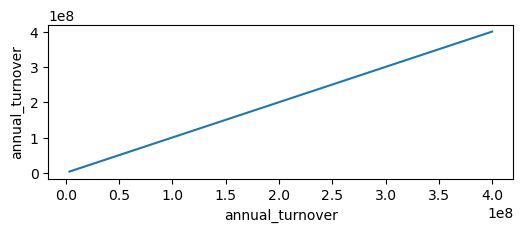

facebook_popularity_quotient


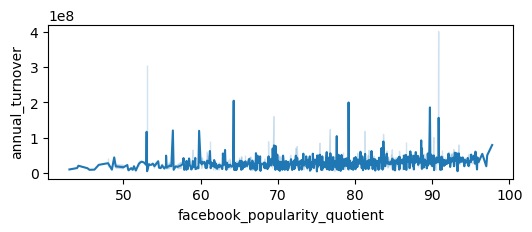

instagram_popularity_quotient


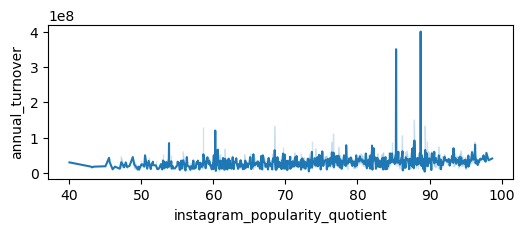

fire_audit


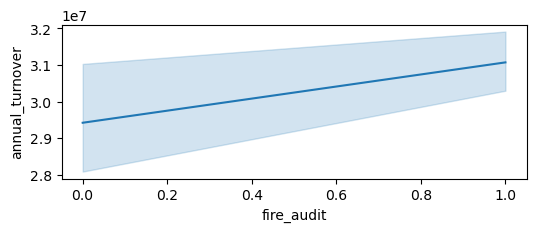

liquor_license_obtained


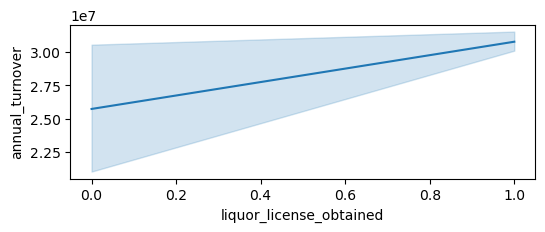

situated_in_a_multi_complex


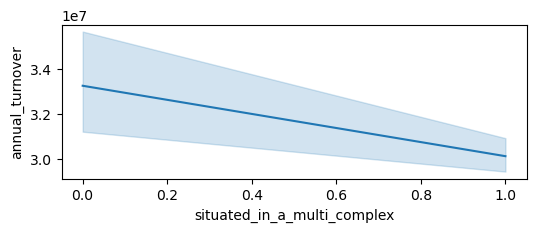

dedicated_parking


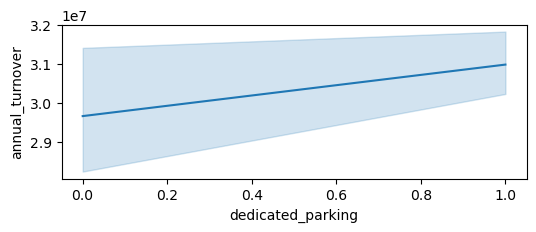

open_sitting_available


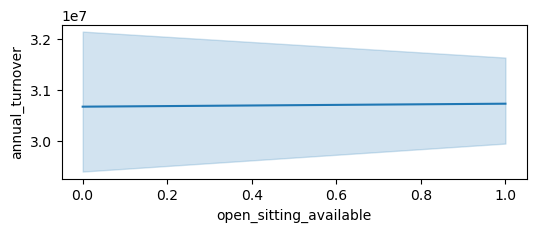

resturant_tier


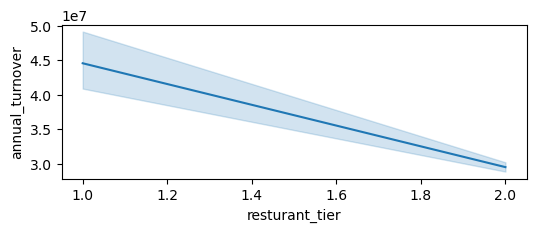

restaurant_zomato_rating


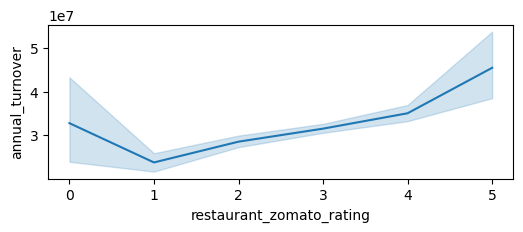

restaurant_city_tier


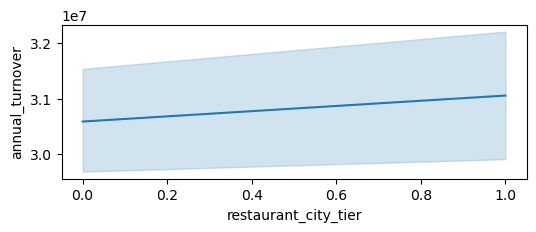

order_wait_time


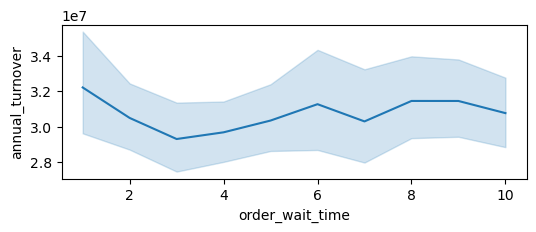

staff_responsivness


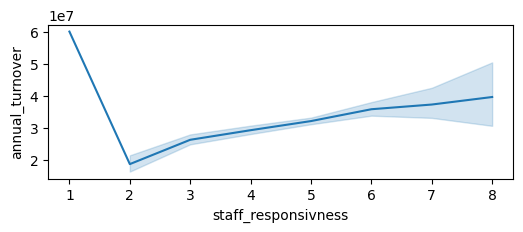

value_for_money


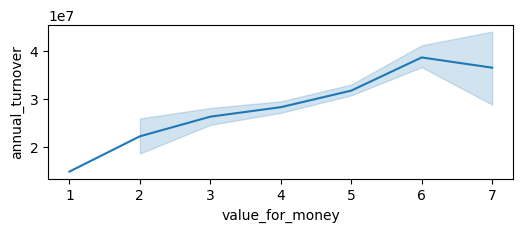

hygiene_rating


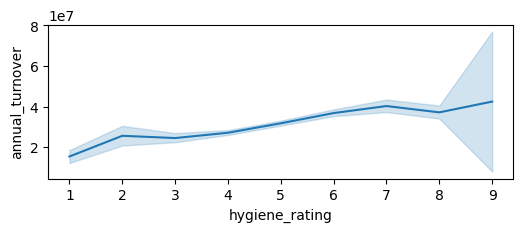

food_rating


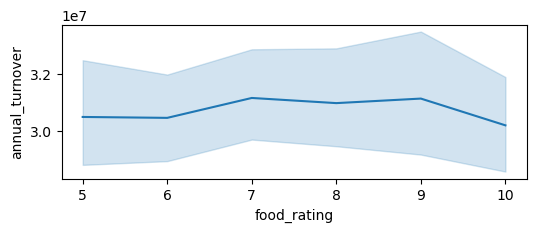

overall_restaurant_rating


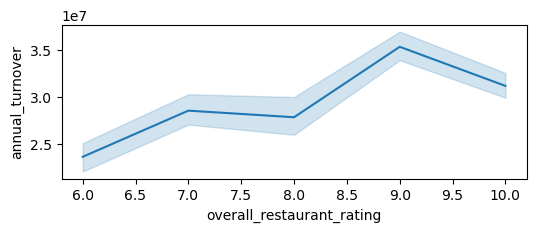

live_music_rating


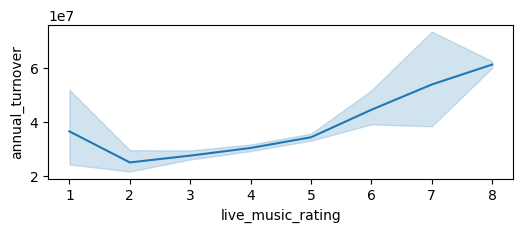

comedy_gigs_rating


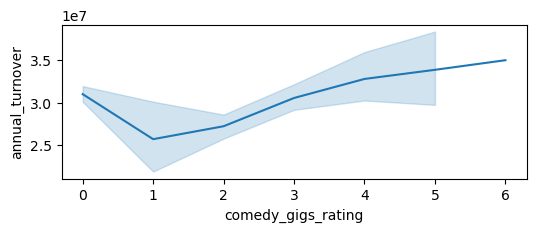

value_deals_rating


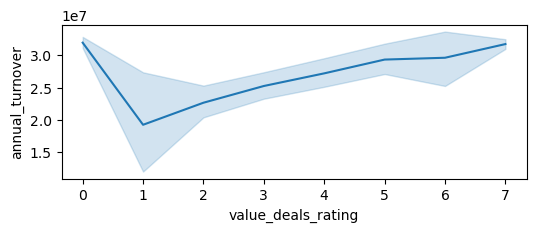

live_sports_rating


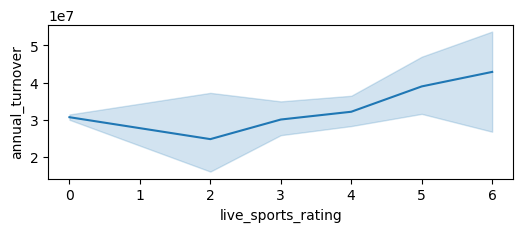

ambience


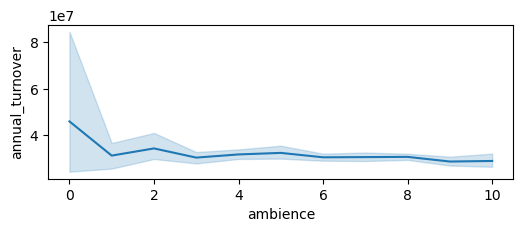

lively


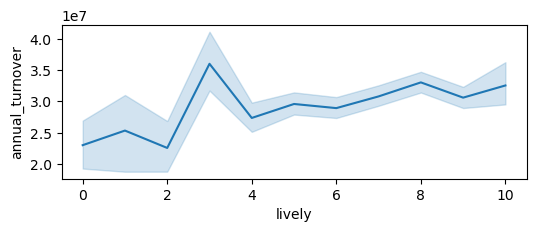

service


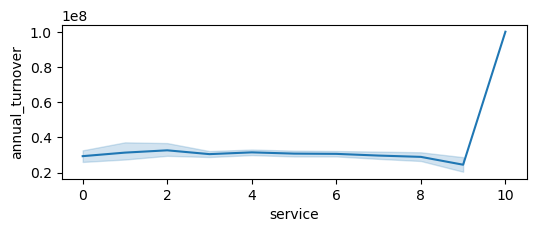

comfortablility


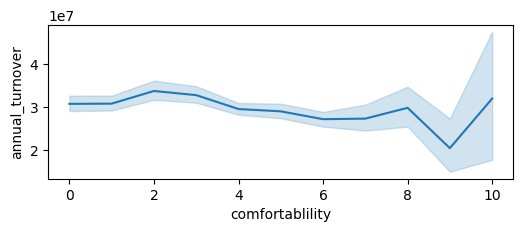

privacy


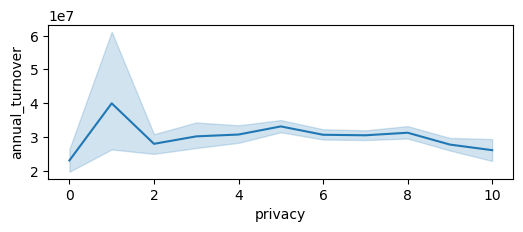

since_years


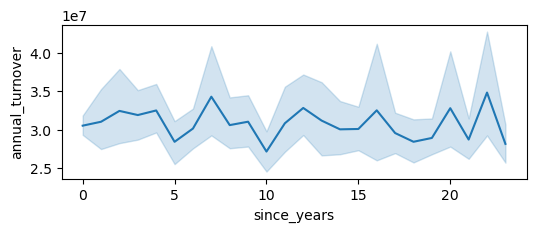

In [202]:
numeric_columns = rdf.select_dtypes(exclude="object").columns.tolist()
for col in numeric_columns:
    plt.figure(figsize=(6, 2))
    print(col)
    #sns.boxplot(data=raw,x=col,y='Attrition_Flag',orient='h')
    sns.lineplot(data=rdf,x=col,y='annual_turnover' )
    plt.show()


In [192]:
def analze_categorical(df, tgt_feature):
    for col in df.columns:
    #print(raw[col].dtype)
        if df[col].dtype == 'object':
            plt.figure(figsize=(5,3))
            sns.barplot(df, x=col,y=tgt_feature)
            plt.show()

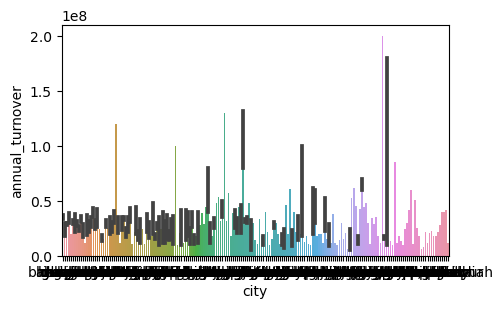

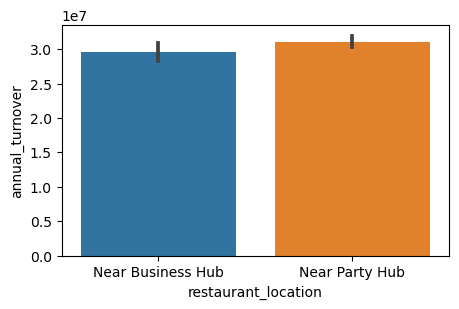

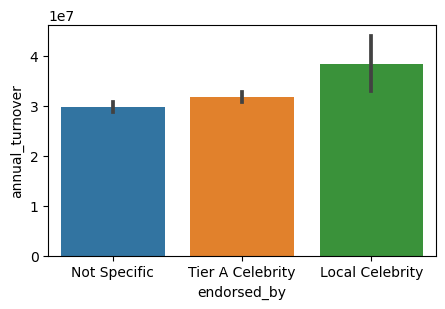

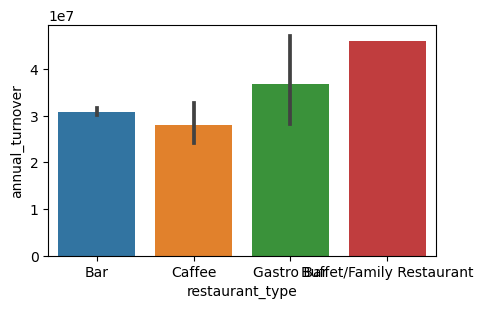

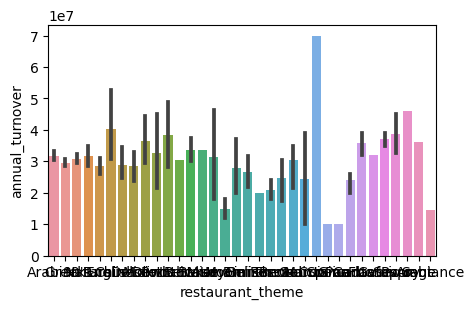

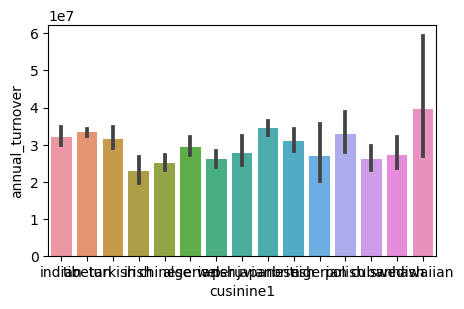

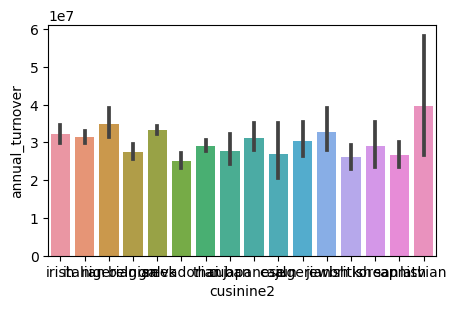

In [203]:
analze_categorical(rdf,'annual_turnover')

In [226]:
rdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   annual_turnover                3493 non-null   int64  
 1   city                           3097 non-null   object 
 2   restaurant_location            3493 non-null   object 
 3   facebook_popularity_quotient   3394 non-null   float64
 4   endorsed_by                    3493 non-null   object 
 5   instagram_popularity_quotient  3437 non-null   float64
 6   fire_audit                     3493 non-null   int64  
 7   liquor_license_obtained        3493 non-null   int64  
 8   situated_in_a_multi_complex    3493 non-null   int64  
 9   dedicated_parking              3493 non-null   int64  
 10  open_sitting_available         3493 non-null   int64  
 11  resturant_tier                 3444 non-null   float64
 12  restaurant_type                3493 non-null   o

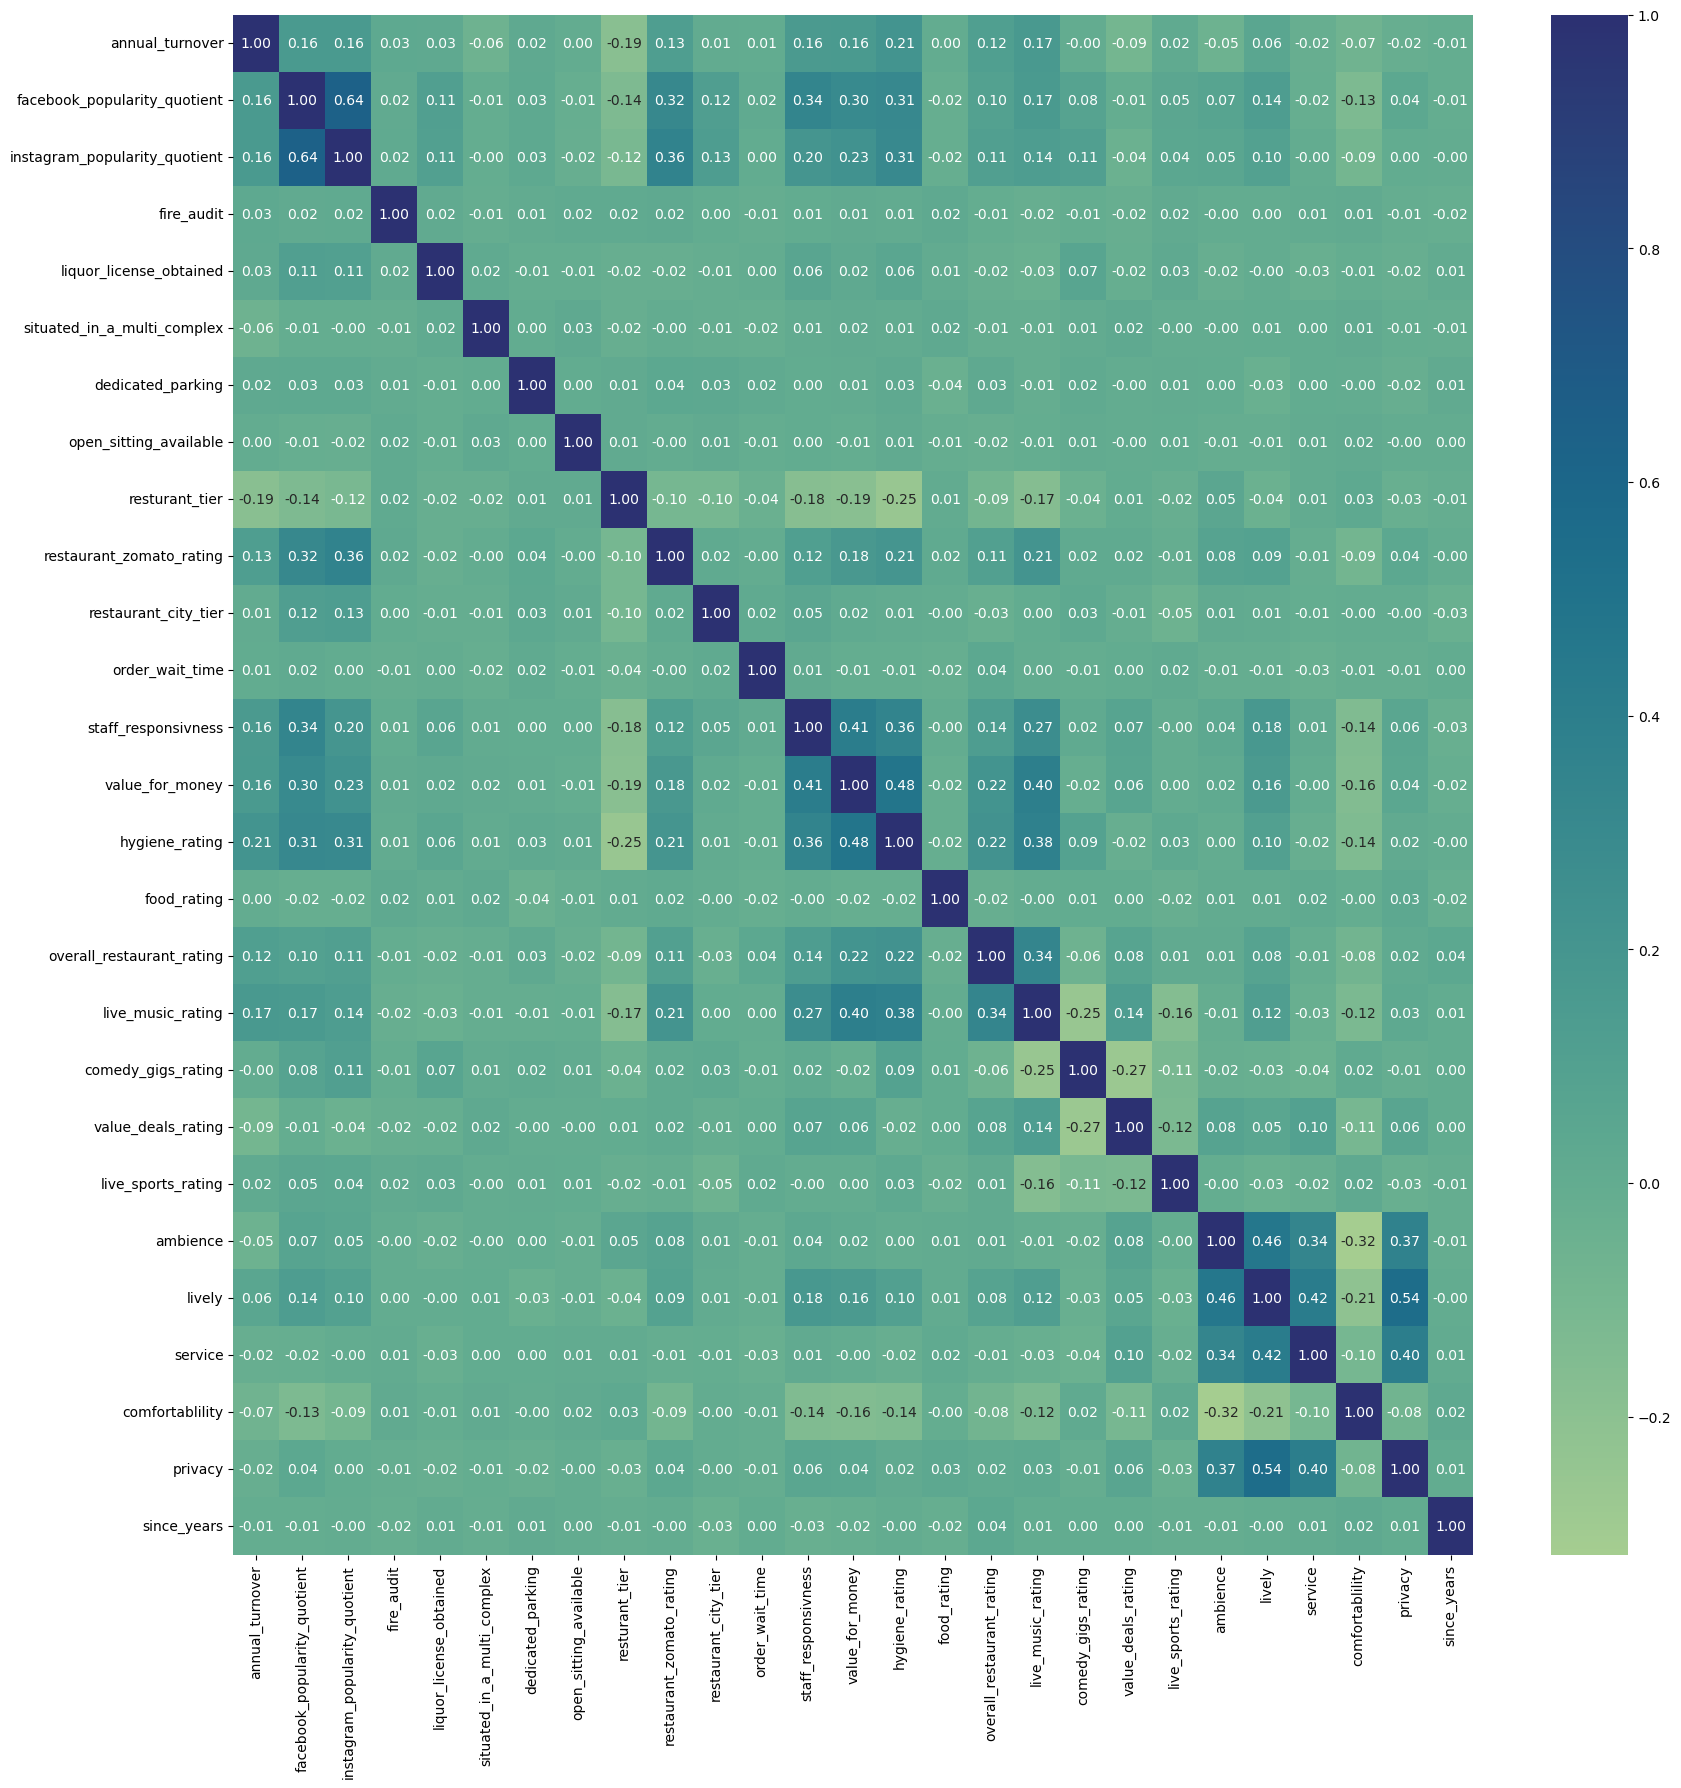

In [225]:
plt.figure(figsize=(20,20))
sns.heatmap(rdf.corr(),cmap='crest',annot=True,fmt='.2f')
plt.show()

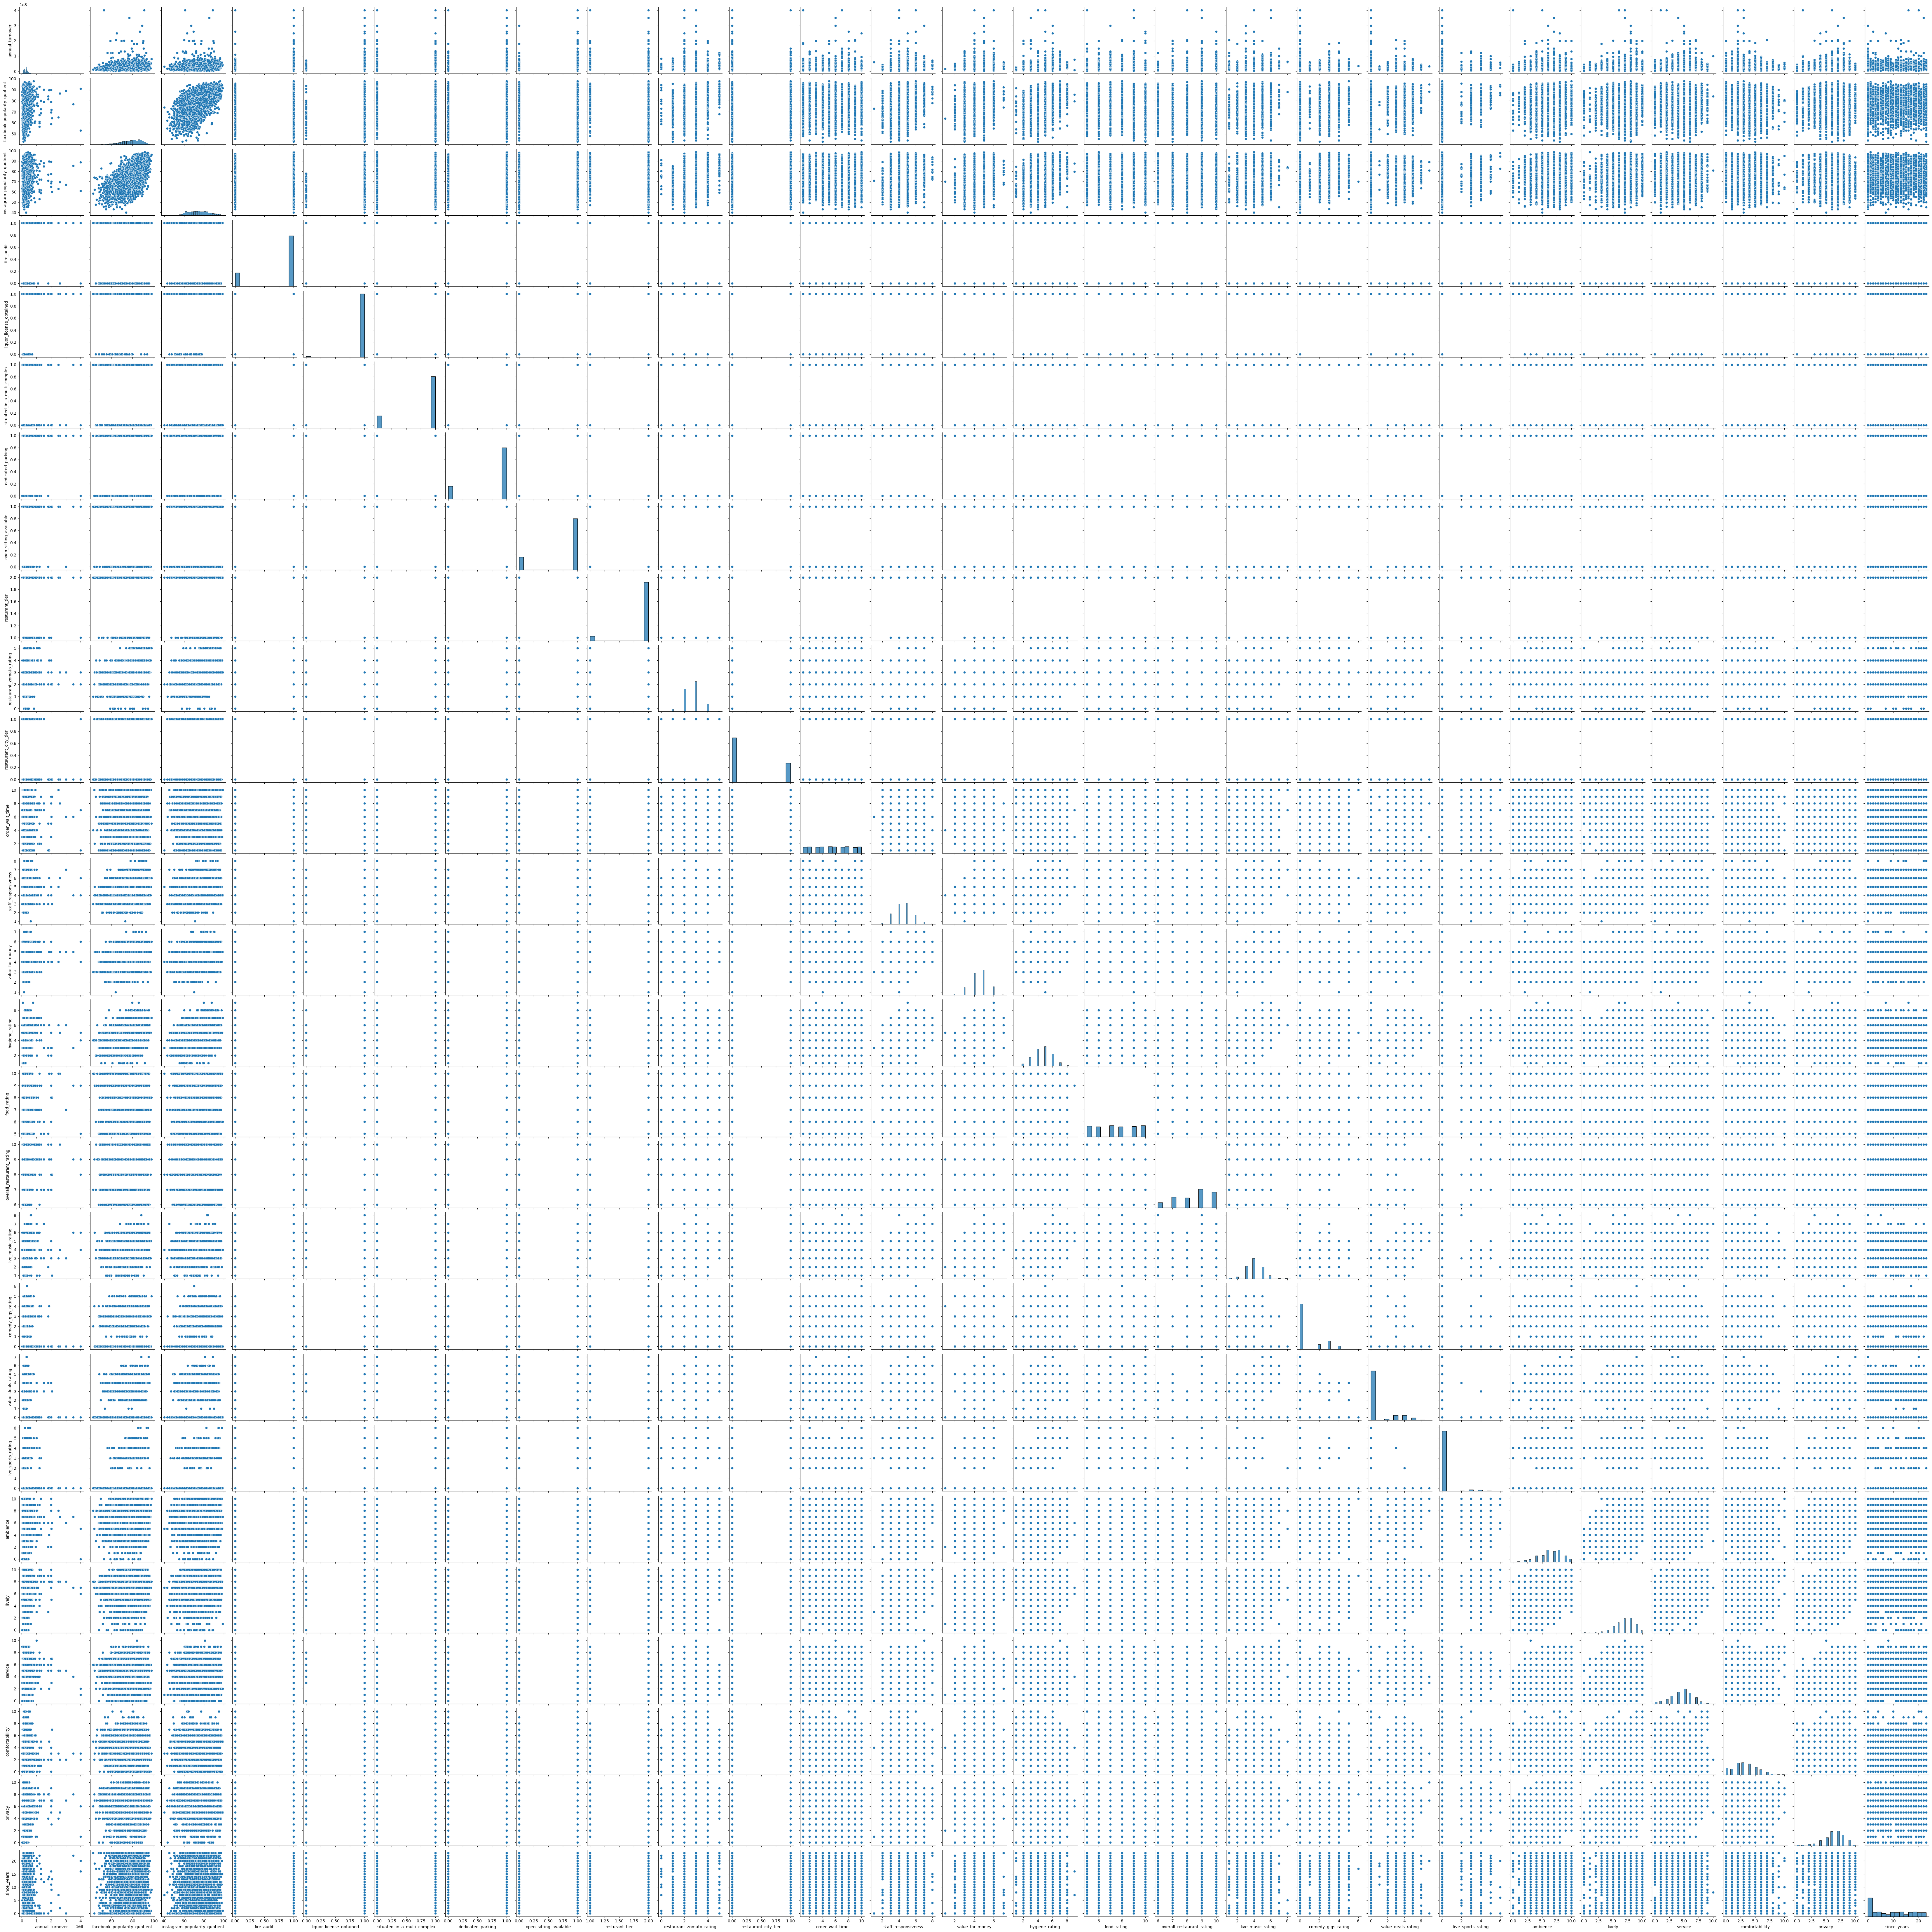

In [220]:
sns.pairplot(rdf)

In [244]:
# ordinal encoder columns list
for c in rdf.columns:
    s= rdf[c].isna().sum()
    if (s > 0):
        print(c,rdf[c].dtype)

rdf['city']=rdf['city'].fillna('')

city object
facebook_popularity_quotient float64
instagram_popularity_quotient float64
resturant_tier float64
overall_restaurant_rating float64
live_music_rating float64
ambience float64


In [248]:
rdf['city']=rdf['city'].fillna('')
rdf['facebook_popularity_quotient']=rdf['facebook_popularity_quotient'].fillna(0)
rdf['instagram_popularity_quotient']=rdf['instagram_popularity_quotient'].fillna(0)
rdf['resturant_tier']=rdf['resturant_tier'].fillna(0)
rdf['overall_restaurant_rating']=rdf['overall_restaurant_rating'].fillna(0)
rdf['live_music_rating']=rdf['live_music_rating'].fillna(0)
rdf['ambience']=rdf['ambience'].fillna(0)

In [278]:
from sklearn.model_selection import train_test_split # Splitting the data for training and testing out model
from sklearn.preprocessing import LabelEncoder
le_dict = dict()
def split_data_set(df,tgt_feature, verbose=0):
    global le_dict
    le_dict = {}
    x = df.drop(columns=[tgt_feature])
    y = df[tgt_feature]

    raw_col = x.select_dtypes(include="object").columns.tolist()
    x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 1, test_size=0.20)
    print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)
    #print('(x_train,y_test)(x_train,y_test)')

    
    for col in raw_col:
        le = LabelEncoder()
        print(col)
        x_train[col] = le.fit_transform(x_train[col])
        x_test[col] = x_test[col].map(lambda s: '<unknown>' if s not in le.classes_ else s)
        le.classes_ = np.append(le.classes_, '<unknown>')
        x_test[col] = le.transform(x_test[col])
        le_dict[col]=le
        if verbose == 1:
            print(dict(zip(le_dict[col].classes_, le_dict[col].transform(le_dict[col].classes_))))

    #le = LabelEncoder()
    #y_train = le.fit_transform(y_train)
    #y_test = le.transform(y_test)
    
    return x_train, x_test, y_train, y_test

In [279]:
x_train, x_test, y_train, y_test = split_data_set(rdf,'annual_turnover')

(2794, 33) (2794,) (699, 33) (699,)
city
restaurant_location
endorsed_by
restaurant_type
restaurant_theme
cusinine1
cusinine2


In [251]:
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error

In [258]:
from sklearn.preprocessing import StandardScaler
def scale_data(x_train,x_test):
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    # Transform on test data
    x_test_scaled = scaler.transform(x_test)
    return x_train_scaled,x_test_scaled

In [269]:
from sklearn.preprocessing import MinMaxScaler
def scale_data_minmax(y_train,y_test):
    scaler = MinMaxScaler()
    y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
    # Transform on test data
    y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))
    return y_train_scaled,y_test_scaled

In [266]:
type(y_train)

pandas.core.series.Series

In [270]:
x_train_scaled,x_test_scaled=scale_data(x_train,x_test)
y_train_scaled,y_test_scaled=scale_data_minmax(y_train,y_test)

In [271]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
lr = LinearRegression()
lr.fit(x_train_scaled, y_train_scaled)
y_pred_dt = lr.predict(x_test_scaled)
accuracy=mean_squared_error(y_test_scaled, y_pred_dt)
print(accuracy)

(2794, 33) (699, 33) (2794,) (699,)
0.0065214470908652395


In [272]:
y_pred_dt

array([[0.1032543 ],
       [0.12024016],
       [0.0686095 ],
       [0.07596831],
       [0.06994717],
       [0.08439136],
       [0.06121509],
       [0.07754325],
       [0.06747196],
       [0.08243808],
       [0.07317878],
       [0.08439818],
       [0.09593319],
       [0.04962891],
       [0.11192063],
       [0.07762448],
       [0.0673379 ],
       [0.05001293],
       [0.07611206],
       [0.07599891],
       [0.10234363],
       [0.04802956],
       [0.06859787],
       [0.05584259],
       [0.09800302],
       [0.05890171],
       [0.0386274 ],
       [0.05999489],
       [0.07960744],
       [0.10012264],
       [0.06764041],
       [0.06047186],
       [0.06862927],
       [0.08362887],
       [0.0620055 ],
       [0.06689369],
       [0.09880055],
       [0.09272646],
       [0.09775715],
       [0.07916431],
       [0.0775495 ],
       [0.10219841],
       [0.08865798],
       [0.12011599],
       [0.0833432 ],
       [0.10254886],
       [0.05210739],
       [0.063

In [273]:
y_test_scaled

array([[0.11111111],
       [0.08369408],
       [0.08369408],
       [0.11976912],
       [0.07936508],
       [0.04473304],
       [0.01875902],
       [0.01875902],
       [0.02020202],
       [0.04761905],
       [0.02741703],
       [0.07647908],
       [0.06204906],
       [0.12842713],
       [0.23520924],
       [0.04761905],
       [0.09379509],
       [0.11688312],
       [0.06204906],
       [0.04184704],
       [0.08658009],
       [0.10966811],
       [0.02453102],
       [0.04761905],
       [0.11976912],
       [0.04761905],
       [0.07936508],
       [0.02453102],
       [0.1024531 ],
       [0.04040404],
       [0.02741703],
       [0.09090909],
       [0.08369408],
       [0.09090909],
       [0.08946609],
       [0.03030303],
       [0.13275613],
       [0.12842713],
       [0.08080808],
       [0.03030303],
       [0.01154401],
       [0.07647908],
       [0.08369408],
       [0.09090909],
       [0.09235209],
       [0.1010101 ],
       [0.08225108],
       [0.018

In [280]:
le_dict

{'city': LabelEncoder(),
 'restaurant_location': LabelEncoder(),
 'endorsed_by': LabelEncoder(),
 'restaurant_type': LabelEncoder(),
 'restaurant_theme': LabelEncoder(),
 'cusinine1': LabelEncoder(),
 'cusinine2': LabelEncoder()}

In [276]:
test_df

city restaurant_location  facebook_popularity_quotient  \
0    bangalore   Near Business Hub                         78.00   
1    hyderabad      Near Party Hub                         89.17   
2    hyderabad      Near Party Hub                         84.00   
3          NaN      Near Party Hub                         79.38   
4         pune      Near Party Hub                         84.67   
..         ...                 ...                           ...   
495      noida      Near Party Hub                         72.00   
496  bangalore      Near Party Hub                         78.28   
497  bangalore      Near Party Hub                         72.60   
498    chennai      Near Party Hub                         93.40   
499     bhopal      Near Party Hub                         65.50   

         Endoresed By  instagram_popularity_quotient  fire_audit  \
0    Tier A Celebrity                          69.00           1   
1        Not Specific                          96.00           1   
2        Not Specific                          86.00           1   
3        Not Specific                          74.40           0   
4        Not Specific                          86.46           1   
..                ...                            ...         ...   
495      Not Specific                          72.00           1   
496      Not Specific                          53.55           1   
497  Tier A Celebrity                          71.40           0   
498      Not Specific                          95.90           1   
499      Not Specific                          68.20           1   

     liquor_license_obtained  situated_in_a_multi_complex  dedicated_parking  \
0                          1                            1                  1   
1                          1                            1                  1   
2                          1                            1                  0   
3                          1                            1                  1   
4                          1                            1                  0   
..                       ...                          ...                ...   
495                        1                            1                  1   
496                        1                            1                  1   
497                        1                            0                  0   
498                        1                            0                  1   
499                        1                            0                  1   

     open_sitting_available  ...  value_deals_rating live_sports_rating  \
0                         0  ...                 0.0                0.0   
1                         1  ...                 0.0                6.0   
2                         1  ...                 0.0                0.0   
3                         1  ...                 0.0                0.0   
4                         0  ...                 0.0                0.0   
..                      ...  ...                 ...                ...   
495                       1  ...                 0.0                0.0   
496                       0  ...                 0.0                0.0   
497                       1  ...                 4.0                0.0   
498                       0  ...                 0.0                0.0   
499                       1  ...                 0.0                0.0   

    ambience  lively  service  comfortablility  privacy  cusinine1  cusinine2  \
0          5       2        2                6        0    tibetan    italian   
1          7       8        5                1        8    tibetan    italian   
2          9       7        5                1        5   algerian    belgian   
3          6       7        6                4        7    tibetan      greek   
4          4       4        7                7        3      cuban    british   
..       ...     ...      ..

city
restaurant_location
endorsed_by
restaurant_type
restaurant_theme
cusinine1
cusinine2


In [283]:
test_df['city']=test_df['city'].fillna('')
test_df['facebook_popularity_quotient']=test_df['facebook_popularity_quotient'].fillna(0)
test_df['instagram_popularity_quotient']=test_df['instagram_popularity_quotient'].fillna(0)
test_df['resturant_tier']=test_df['resturant_tier'].fillna(0)
test_df['overall_restaurant_rating']=test_df['overall_restaurant_rating'].fillna(0)
test_df['live_music_rating']=test_df['live_music_rating'].fillna(0)
test_df['ambience']=test_df['ambience'].fillna(0)

In [284]:
tdf = test_df.copy() 

In [352]:
print(test_df.columns)
print(rdf.columns)

Index(['city', 'restaurant_location', 'facebook_popularity_quotient',
       'Endoresed By', 'instagram_popularity_quotient', 'fire_audit',
       'liquor_license_obtained', 'situated_in_a_multi_complex',
       'dedicated_parking', 'open_sitting_available', 'resturant_tier',
       'restaurant_type', 'restaurant_theme', 'restaurant_zomato_rating',
       'restaurant_city_tier', 'order_wait_time', 'staff_responsivness',
       'value_for_money', 'hygiene_rating', 'food_rating',
       'overall_restaurant_rating', 'live_music_rating', 'comedy_gigs_rating',
       'value_deals_rating', 'live_sports_rating', 'ambience', 'lively',
       'service', 'comfortablility', 'privacy', 'cusinine1', 'cusinine2',
       'since_years'],
      dtype='object')
Index(['annual_turnover', 'city', 'restaurant_location',
       'facebook_popularity_quotient', 'endorsed_by',
       'instagram_popularity_quotient', 'fire_audit',
       'liquor_license_obtained', 'situated_in_a_multi_complex',
       'dedicate

In [353]:
new_col_map={'Endoresed By': 'endorsed_by'}
test_df= test_df.rename(columns=new_col_map)

In [358]:
for col in le_dict:
    le = le_dict.get(col)
    print(dict(zip(le_dict[col].classes_, le_dict[col].transform(le_dict[col].classes_))))
    test_df[col] = test_df[col].map(lambda s: '<unknown>' if s not in le.classes_ else s)
    test_df[col] = le.transform(test_df[col])




{'': 0, 'agra': 1, 'ahmedabad': 2, 'ahmednagar': 3, 'allahabad': 4, 'ambala': 5, 'ariyalur': 6, 'asansol': 7, 'aurangabad': 8, 'australia': 9, 'baddi hp': 10, 'bahadurgarh': 11, 'banagalore': 12, 'bangalore': 13, 'banglore': 14, 'bathinda': 15, 'beawar': 16, 'belgaum': 17, 'bellary': 18, 'bengaluru': 19, 'bhagalpur': 20, 'bhilai': 21, 'bhiwadi': 22, 'bhopal': 23, 'bhubaneshwar': 24, 'bilaspur': 25, 'bulandshahar': 26, 'bundi': 27, 'burdwan': 28, 'chandigarh': 29, 'chandrapur': 30, 'chennai': 31, 'chennai, bangalore': 32, 'cheyyar': 33, 'coimbatore': 34, 'daman and diu': 35, 'dehradun': 36, 'delhi': 37, 'dhanbad': 38, 'dharmapuri': 39, 'dharuhera': 40, 'dubai': 41, 'ernakulam': 42, 'faridabad': 43, 'gagret': 44, 'gajiabaad': 45, 'gandhi nagar': 46, 'gandhinagar': 47, 'ganjam': 48, 'ghaziabad': 49, 'gonda': 50, 'greater noida': 51, 'gulbarga': 52, 'gurga': 53, 'gurgaon': 54, 'gurgoan': 55, 'gwalior': 56, 'haridwar': 57, 'hderabad': 58, 'hospete': 59, 'howrah': 60, 'hyderabad': 61, 'india

In [359]:
test_df

city  restaurant_location  facebook_popularity_quotient  endorsed_by  \
0      13                    0                         78.00            2   
1      61                    1                         89.17            1   
2      61                    1                         84.00            1   
3       0                    1                         79.38            1   
4     122                    1                         84.67            1   
..    ...                  ...                           ...          ...   
495   111                    1                         72.00            1   
496    13                    1                         78.28            1   
497    13                    1                         72.60            2   
498    31                    1                         93.40            1   
499    23                    1                         65.50            1   

     instagram_popularity_quotient  fire_audit  liquor_license_obtained  \
0                            69.00           1                        1   
1                            96.00           1                        1   
2                            86.00           1                        1   
3                            74.40           0                        1   
4                            86.46           1                        1   
..                             ...         ...                      ...   
495                          72.00           1                        1   
496                          53.55           1                        1   
497                          71.40           0                        1   
498                          95.90           1                        1   
499                          68.20           1                        1   

     situated_in_a_multi_complex  dedicated_parking  open_sitting_available  \
0                              1                  1                       0   
1                              1                  1                       1   
2                              1                  0                       1   
3                              1                  1                       1   
4                              1                  0                       0   
..                           ...                ...                     ...   
495                            1                  1                       1   
496                            1                  1                       0   
497                            0                  0                       1   
498                            0                  1                       0   
499                            0                  1                       1   

     ...  value_deals_rating  live_sports_rating  ambience  lively  service  \
0    ...                 0.0                 0.0         5       2        2   
1    ...                 0.0                 6.0         7       8        5   
2    ...                 0.0                 0.0         9       7        5   
3    ...                 0.0                 0.0         6       7        6   
4    ...                 0.0                 0.0         4       4        7   
..   ...                 ...                 ...       ...     ...      ...   
495  ...                 0.0                 0.0         7       8        5   
496  ...                 0.0                 0.0         9       8        8   
497  ...                 4.0                 0.0         1       6        5   
498  ...                 0.0                 0.0         7       7        2   
499  ...                 0.0                 0.0         7       6        6   

     comfortablility  privacy  cusinine1  cusinine2  since_years  
0                  6        0         12          7           11  
1                  1        8         12          7           19  
2                  1        5          0          1           12  
3            

In [361]:
scaler = StandardScaler()
tdf_scaled = scaler.fit_transform(test_df)

In [362]:
tdf_pred= lr.predict(tdf_scaled)

In [363]:
tdf_pred

array([[0.06229467],
       [0.11916235],
       [0.08782606],
       [0.10162139],
       [0.10282463],
       [0.1003102 ],
       [0.07546923],
       [0.07511469],
       [0.07336144],
       [0.06568515],
       [0.08241065],
       [0.10045557],
       [0.06864906],
       [0.06399729],
       [0.06553498],
       [0.07457309],
       [0.09504898],
       [0.04998672],
       [0.10233301],
       [0.0866565 ],
       [0.03668417],
       [0.1018816 ],
       [0.0839373 ],
       [0.07605603],
       [0.08785802],
       [0.0561081 ],
       [0.10192231],
       [0.09999102],
       [0.09085598],
       [0.06055453],
       [0.09290143],
       [0.1175253 ],
       [0.08118987],
       [0.08013983],
       [0.06925953],
       [0.07523965],
       [0.1085719 ],
       [0.10515978],
       [0.06045492],
       [0.06002715],
       [0.06331546],
       [0.07583532],
       [0.07570898],
       [0.0634908 ],
       [0.08572901],
       [0.05045278],
       [0.06110929],
       [0.100

In [369]:
scaler = MinMaxScaler()
scaler.fit_transform(y_train.values.reshape(-1, 1))
scaler.data_max_

array([3.5e+08])

In [372]:
scaler

3239    24500000
2773    12000000
936     21000000
432     47500000
2977    18000000
          ...   
2763    31000000
905     44000000
1096    35000000
235     12000000
1061    30000000
Name: annual_turnover, Length: 2794, dtype: int64

In [375]:
result_df = pd.DataFrame(scaler.inverse_transform(tdf_pred))

In [377]:
odf = pd.read_csv('Test_dataset.csv')

In [404]:
result = odf.join(result_df)

In [416]:
result.rename(columns={0:'expected_turnover'},inplace=True)

In [420]:
result['expected_turnover']  = result['expected_turnover'].map(lambda x: '%.f' % x)

In [424]:
result[['Registration Number','expected_turnover']].to_csv('submission.csv')

In [313]:
from SoundsLike.SoundsLike import Search

# Find perfect homophones
#perfect_homophones = Search.perfectHomophones('guragaon')
#print(perfect_homophones)  # Output: ['Johnathan', 'Johnathon', 'Jonathan', 'Jonathon', 'Jonothan']

# Find close homophones
close_homophones = Search.closeHomophones('guragaon')
print(close_homophones)  # Output: ['Lucey', 'Lucie', 'Lucy', 'Luisi']


ValueError: Dictionary Error: Search term or search token not found in dictionary. Contact administrator to update dictionary if necessary.

In [314]:
! pip install fuzzywuzzy

  Obtaining dependency information for fuzzywuzzy from https://files.pythonhosted.org/packages/43/ff/74f23998ad2f93b945c0309f825be92e04e0348e062026998b5eefef4c33/fuzzywuzzy-0.18.0-py2.py3-none-any.whl.metadata


In [341]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

list1 = ['apple', 'banana', 'cherry', 'date']
list2 = ['apricot', 'blueberry', 'cherry', 'dragonfruit']

similar_words = []
for word in citylist:
    if word not in x.keys():
        match, score = process.extractOne(word, x.keys())
        if score > 80:  # You can adjust the threshold
            print('similar word found',match, ' for ' , word)
        else:
            print(word)
    

print(similar_words)


similar word found gurgaon  for  guragaon
hubli
guwahati
similar word found new delhi  for  new dehli
similar word found ambala  for  ambala city
rae bareli
phagwara
latur (maharashtra )
sampla
haldia
mainpuri
gorakhpur
karad
haryana
similar word found nellore  for  vellore
patiala
hissar
similar word found una  for  yamuna nagar
rourkela
similar word found banagalore  for  banaglore
baripada
dausa
similar word found banglore  for  asifabadbanglore
rajpura
dammam
similar word found sahibabad  for  shahibabad
[]


In [334]:
x.keys()

dict_keys(['', 'agra', 'ahmedabad', 'ahmednagar', 'allahabad', 'ambala', 'ariyalur', 'asansol', 'aurangabad', 'australia', 'baddi hp', 'bahadurgarh', 'banagalore', 'bangalore', 'banglore', 'bathinda', 'beawar', 'belgaum', 'bellary', 'bengaluru', 'bhagalpur', 'bhilai', 'bhiwadi', 'bhopal', 'bhubaneshwar', 'bilaspur', 'bulandshahar', 'bundi', 'burdwan', 'chandigarh', 'chandrapur', 'chennai', 'chennai, bangalore', 'cheyyar', 'coimbatore', 'daman and diu', 'dehradun', 'delhi', 'dhanbad', 'dharmapuri', 'dharuhera', 'dubai', 'ernakulam', 'faridabad', 'gagret', 'gajiabaad', 'gandhi nagar', 'gandhinagar', 'ganjam', 'ghaziabad', 'gonda', 'greater noida', 'gulbarga', 'gurga', 'gurgaon', 'gurgoan', 'gwalior', 'haridwar', 'hderabad', 'hospete', 'howrah', 'hyderabad', 'india', 'indore', 'jabalpur', 'jaipur', 'jalandhar', 'jammu', 'jamnagar', 'jamshedpur', 'jhajjar', 'jodhpur', 'joshimath', 'jowai', 'kanpur', 'karnal', 'kharagpur', 'khopoli', 'kochi', 'kochi/cochin, chennai and coimbatore', 'kolhapu

In [330]:
import difflib

In [331]:
import difflib

list1 = ['apple', 'banana', 'cherry', 'date']
list2 = ['apricot', 'blueberry', 'cherry', 'dragonfruit']

similar_words = []
for word in list1:
    matches = difflib.get_close_matches(word, list2)
    if matches:
        similar_words.append((word, matches))

print(similar_words)


[('cherry', ['cherry'])]


In [402]:
df = pd.DataFrame({'A': [2.508510e+07, 4.478976e+07, 3.912873e+07], 'B': [1.23e10, 2.34e10, 3.45e10]})
df
# Apply formatting to each column


A             B
0  25085100.0  1.230000e+10
1  44789760.0  2.340000e+10
2  39128730.0  3.450000e+10

In [403]:
df = df.applymap(lambda x: '%.f' % x)
print(df)

          A            B
0  25085100  12300000000
1  44789760  23400000000
2  39128730  34500000000


In [394]:
x = 1.23e+10

In [396]:
print('%.0f' % x)

12300000000
